In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
train = pd.read_csv('D:\\Repo\\ML_Folder\\train.csv')
test = pd.read_csv('D:\\Repo\\ML_Folder\\test.csv')

In [3]:
# Loại bỏ các dòng chứa giá trị thiếu trong tập huấn luyện
train = train.dropna()

In [4]:
# Hiển thị 2 dòng đầu của tập huấn luyện và tập kiểm tra
print(train.head(2))
print(test.head(2))

      x          y
0  24.0  21.549452
1  50.0  47.464463
    x          y
0  77  79.775152
1  21  23.177279


In [5]:
# Check info của tập huấn luyện và tập kiểm tra
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


In [7]:
# Check số xem trong tập huấn luyện có dòng nào bị trùng không
duplicates_exist = train.duplicated().any()
print(duplicates_exist)

False


In [8]:
# Trích xuất các cột số từ tập huấn luyện và tập kiểm tra
X_train = train['x']
y_train = train['y']
X_test = test['x']
y_test = test['y']
print(X_train.shape)
print(X_test.shape)

(699,)
(300,)


In [9]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1,1)

In [10]:
# Chuẩn hóa
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.min(), X_train.max())

-1.72857469859145 1.7275858114641094


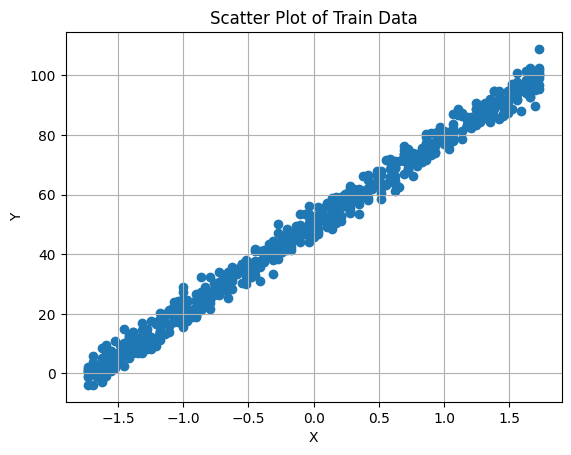

In [11]:
# Tạo biểu đồ phân tán
plt.scatter(X_train, y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Train Data')
plt.grid(True)  # Enable grid
plt.show()

In [12]:
# Tạo Linear Regression model
model = LinearRegression()

# Điều chỉnh mô hình
model.fit(X_train, y_train)

# Sử dụng mô hình để dự đoán tập kiểm tra
predictions = model.predict(X_test)

# Tính toán mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error is: {mse:.4f}')

Mean squared error is: 9.4329


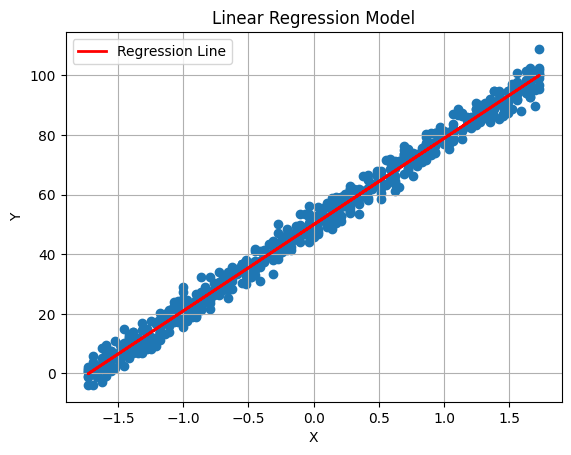

In [14]:
# Vẽ đường hồi quy
plt.plot(X_test, predictions, color='red', linewidth=2, label='Regression Line')
plt.scatter(X_train, y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()